# Exploratory Data Analysis of Rideshare Data

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn color theme
sns.set_theme(style="ticks")

## Data Preparation and Cleaning

### Load Data

In [407]:
df = pd.read_csv('data.csv')

### Check data types

In [408]:
df.dtypes

shift_id                 int64
date                    object
day_of_week             object
time_of_day             object
start_location          object
end_location_street     object
end_location_zip         int64
expected_earnings      float64
actual_earnings        float64
duration               float64
distance               float64
time_requested          object
dtype: object

#### Prep and formatting data by combining date and time and changing to proper data types.

In [409]:
df['datetime_requested'] = df['date'] + ' ' + df['time_requested']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['day_of_week', 'time_of_day']] = df[['day_of_week', 'time_of_day']].astype('category')

df['end_location_zip'] = df['end_location_zip'].astype('object')
df['datetime_requested'] = pd.to_datetime(df['datetime_requested'], format='%Y-%m-%d %H:%M')

# This is so these two variables are ordered
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
times = ['Breakfast','Lunch','Dinner']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days, ordered=True)
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=times, ordered=True)
df.dtypes

shift_id                        int64
date                   datetime64[ns]
day_of_week                  category
time_of_day                  category
start_location                 object
end_location_street            object
end_location_zip               object
expected_earnings             float64
actual_earnings               float64
duration                      float64
distance                      float64
time_requested                 object
datetime_requested     datetime64[ns]
dtype: object

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

#### Initial Data Overview

In [410]:
df.head()

,shift_id,date,day_of_week,time_of_day,start_location,end_location_street,end_location_zip,expected_earnings,actual_earnings,duration,distance,time_requested,datetime_requested
0,110,2024-01-10,Wednesday,Breakfast,McDonald's (6680 N 5th St),W Deer Springs Way,89084,2.25,2.25,18.88,1.0,10:47,2024-01-10 10:47:00
1,110,2024-01-10,Wednesday,Breakfast,Sierra Gold (6929 N Aliante Pkwy),Acacia Grove St,89031,3.08,3.08,18.47,6.3,10:57,2024-01-10 10:57:00
2,110,2024-01-10,Wednesday,Lunch,KFC (5700 Losee Rd),N Lamb Blvd,89115,7.77,7.71,25.57,8.5,11:26,2024-01-10 11:26:00
3,110,2024-01-10,Wednesday,Lunch,Denny's (420 E Deer Springs Way),Calumet Point St,89081,6.79,6.79,20.40,7.4,11:48,2024-01-10 11:48:00
4,110,2024-01-10,Wednesday,Lunch,Jack in the Box (6345 N Losee Rd),Granite Ash Ave,89081,3.33,3.33,13.83,3.8,12:19,2024-01-10 12:19:00


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   shift_id             189 non-null    int64         
 1   date                 189 non-null    datetime64[ns]
 2   day_of_week          189 non-null    category      
 3   time_of_day          189 non-null    category      
 4   start_location       189 non-null    object        
 5   end_location_street  189 non-null    object        
 6   end_location_zip     189 non-null    object        
 7   expected_earnings    189 non-null    float64       
 8   actual_earnings      189 non-null    float64       
 9   duration             189 non-null    float64       
 10  distance             189 non-null    float64       
 11  time_requested       189 non-null    object        
 12  datetime_requested   189 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](2), 

#### Summary Statistics for Numerical Variables

In [412]:
df.describe()

,shift_id,date,expected_earnings,actual_earnings,duration,distance,datetime_requested
count,189.000000,189,189.000000,189.000000,189.000000,189.000000,189
mean,126.634921,2024-01-21 23:21:54.285714176,6.606772,6.639471,18.936349,5.201587,2024-01-22 14:06:46.349206528
min,110.000000,2024-01-10 00:00:00,2.000000,2.000000,7.050000,1.000000,2024-01-10 10:47:00
25%,118.000000,2024-01-15 00:00:00,4.460000,4.430000,13.580000,3.300000,2024-01-15 11:34:00
50%,126.000000,2024-01-21 00:00:00,5.700000,5.660000,17.370000,4.700000,2024-01-21 17:36:00
75%,136.000000,2024-01-29 00:00:00,7.900000,7.900000,22.800000,6.500000,2024-01-29 13:16:00
max,145.000000,2024-02-06 00:00:00,18.320000,18.840000,48.850000,14.300000,2024-02-06 18:34:00
std,10.535606,NaN,3.101045,3.239245,7.261209,2.575673,NaN


**Central Tendencies**

In [413]:
numerics = df[['expected_earnings', 'actual_earnings', 'distance', 'duration']]

print(numerics.mean(), '\n')
print(numerics.median())

expected_earnings     6.606772
actual_earnings       6.639471
distance              5.201587
duration             18.936349
dtype: float64 

expected_earnings     5.70
actual_earnings       5.66
distance              4.70
duration             17.37
dtype: float64


**Dispersion**

In [414]:
print('Variance:\n', numerics.var(), '\n')
print('Std. Dev:\n', numerics.std(), '\n')
print('Skewness:\n', numerics.skew(), '\n')
print('Kurtosis:\n', numerics.kurtosis(), '\n')
print('Max:\n', numerics.max(), '\n')
print('Min:\n', numerics.min(), '\n')

Variance:
 expected_earnings     9.616479
actual_earnings      10.492708
distance              6.634093
duration             52.725151
dtype: float64 

Std. Dev:
 expected_earnings    3.101045
actual_earnings      3.239245
distance             2.575673
duration             7.261209
dtype: float64 

Skewness:
 expected_earnings    1.445979
actual_earnings      1.506197
distance             0.925953
duration             1.041596
dtype: float64 

Kurtosis:
 expected_earnings    2.427109
actual_earnings      2.557246
distance             0.806866
duration             1.398412
dtype: float64 

Max:
 expected_earnings    18.32
actual_earnings      18.84
distance             14.30
duration             48.85
dtype: float64 

Min:
 expected_earnings    2.00
actual_earnings      2.00
distance             1.00
duration             7.05
dtype: float64 



**Position**

In [415]:
numerics.quantile([.25,.5,.75])

,expected_earnings,actual_earnings,distance,duration
0.25,4.46,4.43,3.3,13.58
0.50,5.70,5.66,4.7,17.37
0.75,7.90,7.90,6.5,22.80


In [416]:
# This gives the interquartile range (IQR)
numerics.quantile(.75) - numerics.quantile(.25)

expected_earnings    3.44
actual_earnings      3.47
distance             3.20
duration             9.22
dtype: float64

#### Summary Statistics for Categorical Variables

In [417]:
categoricals = df[
    ['day_of_week', 'time_of_day', 'start_location', 'end_location_street',
     'end_location_zip', 'time_requested']]
categoricals.describe(include=['O'])

,start_location,end_location_street,end_location_zip,time_requested
count,189,189,189,189
unique,111,172,17,152
top,Roberto's Taco Shop (6320 Simmons St),W Deer Springs Way,89084,17:02
freq,10,3,51,3


### Univariate Analysis

#### Numerical Variable Analysis

**Histograms**

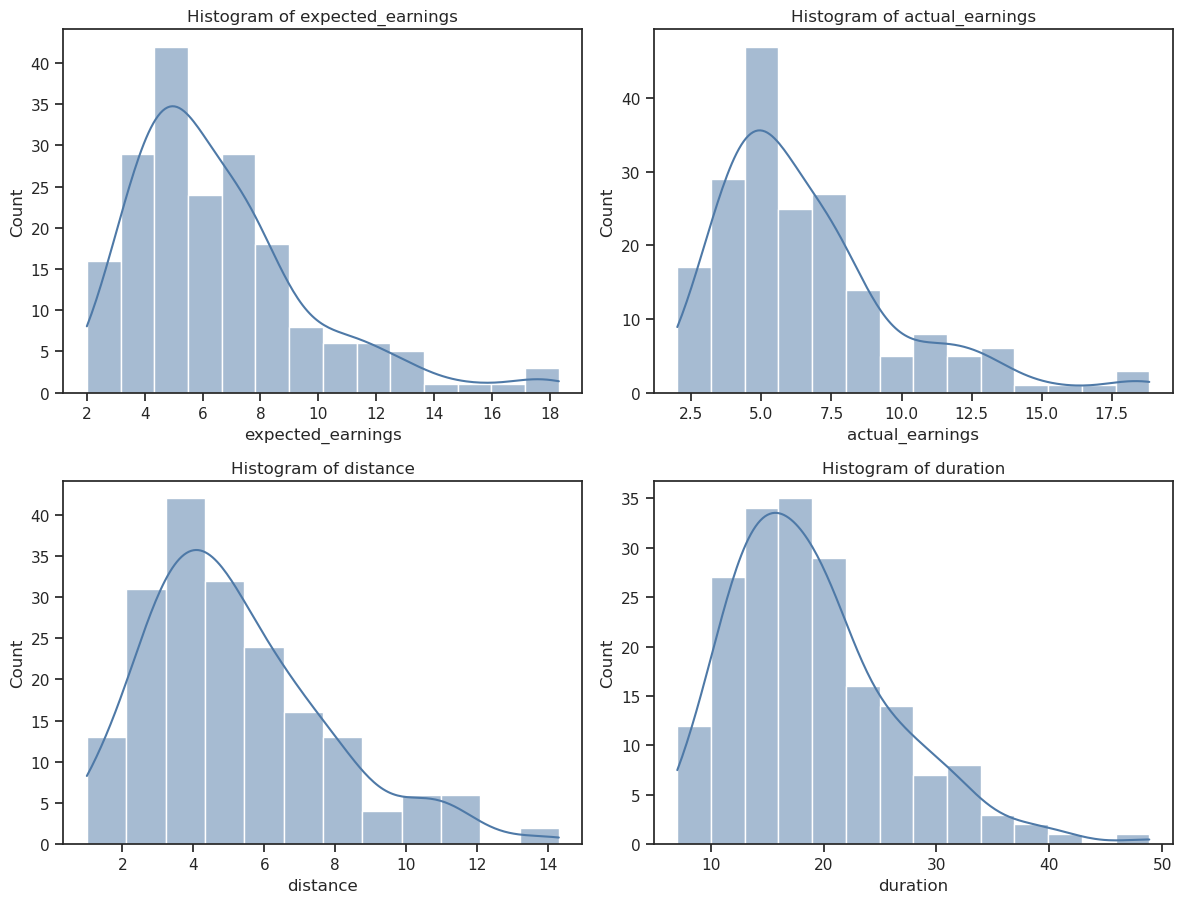

In [418]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, var in enumerate(numerics.columns):
    row, col = i // 2, i % 2
    sns.histplot(data=numerics, x=var, kde=True, ax=axes[row, col], color='#4E79A7')
    axes[row, col].set_title(f'Histogram of {var}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Box Plots**

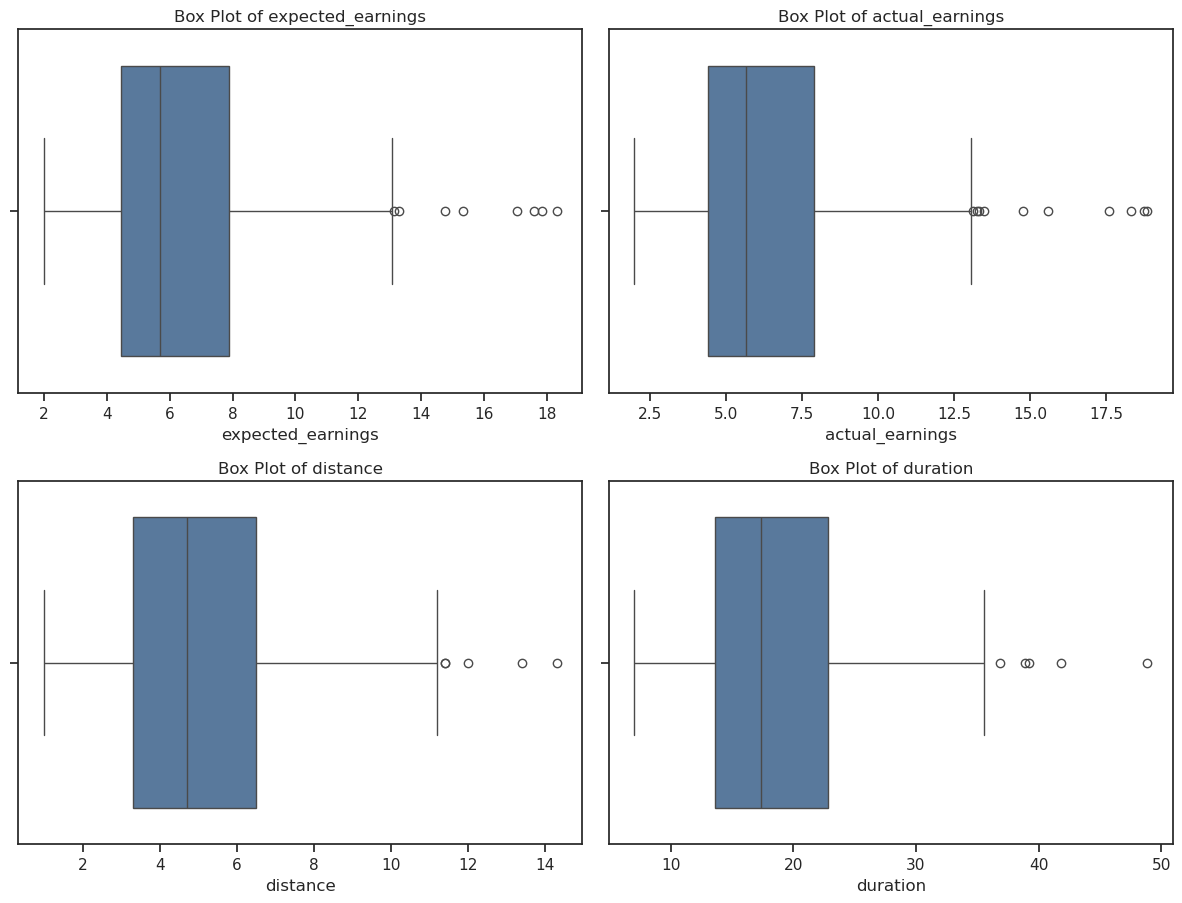

In [419]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, var in enumerate(numerics.columns):
    row, col = i // 2, i % 2
    sns.boxplot(x=numerics[var], ax=axes[row, col], color='#4E79A7')
    axes[row, col].set_title(f'Box Plot of {var}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Categorical Variable Analysis

In [420]:
top_5_restaurants = df['start_location'].value_counts().head(5)
top_5_zip_codes = df['end_location_zip'].value_counts().head(5)

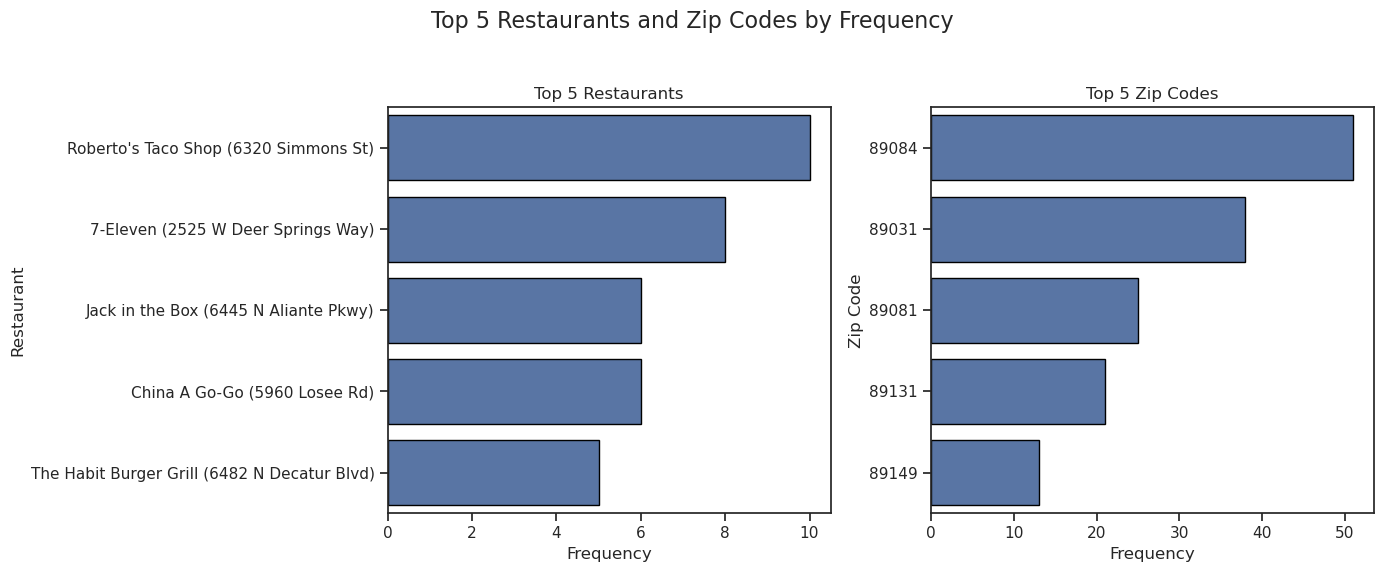

In [421]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Top 5 Restaurants and Zip Codes by Frequency', fontsize=16)

sns.barplot(x=top_5_restaurants.values, legend=False, y=top_5_restaurants.index, ax=axes[0], edgecolor='black')
axes[0].set_title('Top 5 Restaurants')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Restaurant')

sns.barplot(x=top_5_zip_codes.values, legend=False, y=top_5_zip_codes.index.astype(str), ax=axes[1], edgecolor='black')
axes[1].set_title('Top 5 Zip Codes')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Zip Code')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

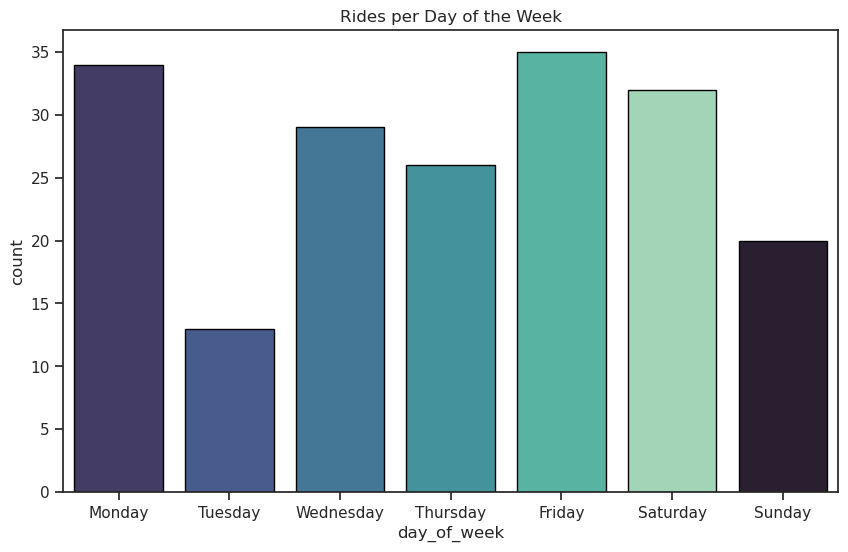

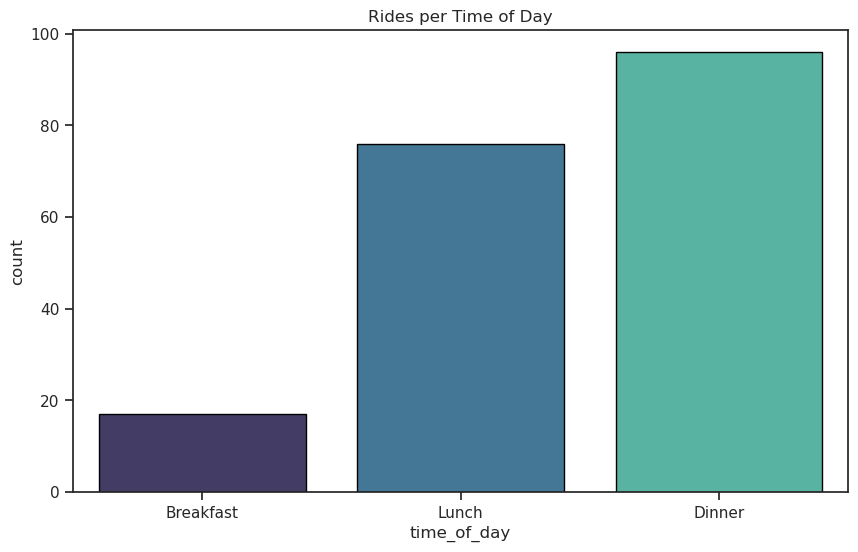

In [422]:
# Plot for 'day_of_the_week'
plt.figure(figsize=(10, 6))
sns.countplot(hue='day_of_week', legend=False, x='day_of_week', data=categoricals, 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
              edgecolor='black', palette='mako')
plt.title('Rides per Day of the Week')
plt.show()

# Plot for 'time_of_day'
plt.figure(figsize=(10, 6))
sns.countplot(hue='time_of_day', legend=False, x='time_of_day', data=categoricals, 
              order=['Breakfast', 'Lunch', 'Dinner'], 
              edgecolor='black', palette='mako')
plt.title('Rides per Time of Day')
plt.show()

### Bivariate Analysis

### Feature Engineering

#### Earnings Per Hour

In [436]:
total_earnings_by_day_time = df.groupby(['day_of_week', 'time_of_day'], observed=True)['actual_earnings'].sum()
total_minutes_by_day_time = df.groupby(['day_of_week', 'time_of_day'], observed=True)['duration'].sum()

eph_by_day_time = 60 * (total_earnings_by_day_time / total_minutes_by_day_time)

In [435]:
latex_code_updated = r"""
\[
\begin{array}{l l r}
\hline
\textbf{Day of Week} & \textbf{Time of Day} & \textbf{Earnings Per Hour (\$)} \\
\hline
\text{Sunday} & \text{Lunch} & 19.68 \\
              & \text{Dinner} & 25.30 \\
\text{Monday} & \text{Lunch} & 19.44 \\
              & \text{Dinner} & 18.84 \\
\text{Tuesday} & \text{Lunch} & 18.74 \\
               & \text{Dinner} & 27.41 \\
\text{Wednesday} & \text{Breakfast} & 10.40 \\
                 & \text{Lunch} & 20.64 \\
                 & \text{Dinner} & 19.23 \\
\text{Thursday} & \text{Breakfast} & 13.84 \\
                & \text{Lunch} & 23.84 \\
                & \text{Dinner} & 21.61 \\
\text{Friday} & \text{Breakfast} & 9.21 \\
              & \text{Lunch} & 24.29 \\
              & \text{Dinner} & 22.46 \\
\text{Saturday} & \text{Breakfast} & 17.73 \\
                & \text{Lunch} & 18.58 \\
                & \text{Dinner} & 25.76 \\
\hline
\end{array}
\]
"""

display(Latex(latex_code_updated))


<IPython.core.display.Latex object>

#### Earnings Per 5 Miles

In [438]:
total_miles_per_day_time = df.groupby(['day_of_week', 'time_of_day'], observed=True)['distance'].sum()
epm_by_day_time = total_earnings_by_day_time / total_miles_per_day_time

In [439]:
from IPython.display import Latex

latex_code_for_earnings_per_5_miles = r"""
\[
\begin{array}{l l r}
\hline
\textbf{Day of Week} & \textbf{Time of Day} & \textbf{Earnings per 5 Miles (\$)} \\
\hline
\text{Sunday} & \text{Lunch} & 5.30 \\
              & \text{Dinner} & 7.73 \\
\text{Monday} & \text{Lunch} & 5.83 \\
              & \text{Dinner} & 6.58 \\
\text{Tuesday} & \text{Lunch} & 5.32 \\
               & \text{Dinner} & 10.88 \\
\text{Wednesday} & \text{Breakfast} & 3.76 \\
                 & \text{Lunch} & 5.38 \\
                 & \text{Dinner} & 5.68 \\
\text{Thursday} & \text{Breakfast} & 5.65 \\
                & \text{Lunch} & 6.03 \\
                & \text{Dinner} & 6.93 \\
\text{Friday} & \text{Breakfast} & 3.68 \\
              & \text{Lunch} & 7.41 \\
              & \text{Dinner} & 6.58 \\
\text{Saturday} & \text{Breakfast} & 5.57 \\
                & \text{Lunch} & 6.01 \\
                & \text{Dinner} & 7.74 \\
\hline
\end{array}
\]
"""

display(Latex(latex_code_for_earnings_per_5_miles))

<IPython.core.display.Latex object>

In [399]:
5 * epm_by_day_time

day_of_week  time_of_day
Friday       Breakfast       3.675325
             Dinner          6.583655
             Lunch           7.406250
Monday       Dinner          6.581967
             Lunch           5.833333
Saturday     Breakfast       5.574074
             Dinner          7.740780
             Lunch           6.011013
Sunday       Dinner          7.726974
             Lunch           5.302657
Thursday     Breakfast       5.648374
             Dinner          6.928687
             Lunch           6.029284
Tuesday      Dinner         10.884444
             Lunch           5.323770
Wednesday    Breakfast       3.764000
             Dinner          5.680328
             Lunch           5.379653
dtype: float64